# <font style="color:rgb(50,120,229)">Resizing an Image </font>

We will use [**`cv2.resize`**](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) function for resizing an image.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	)
```
**Parameters**
- **`src`** - input image
- **`dst`** - output resized image
- **`dsize`** - output image size
- **`fx`** - scale factor along the horizontal axis; 
- **`fy`** - scale factor along the vertical axis; 
Either dsize or both fx and fy must be non-zero.
- **`interpolation`** - interpolation method ( Bilinear / Bicubic etc ). 

Check interpolation flags [here](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) 


There are two ways of using the resize function.
1. Specify width and height of output image explicitly
    > Use the dsize argument to specify the output size in the form (width,height).
2. Specify the scaling factors for resizing ( for both width and height )
    > Use fx and fy arguments to specify the scaling factor for horizontal and vertical axis respectively. It should be a float. 
    
    > The output size is calculated as: `Size(round(fx*src.cols), round(fy*src.rows))`

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Read image
image = cv2.imread(DATA_PATH+"images/boy.jpg")

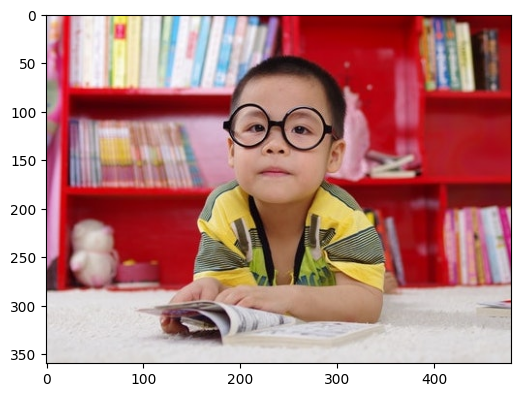

In [4]:
# Let's see what image we are dealing with
plt.imshow(image[:,:,::-1])

## <font style="color:rgb(50,120,229)">Method1 - Specify width and height</font>
You have to manually keep track of the aspect ratio of the output image as this method will not preserve the aspect ratio between input and output image.

Let us take an example to see how to use the functions in OpenCV for resizing.

Text(0.5, 1.0, 'Scaled Down Image')

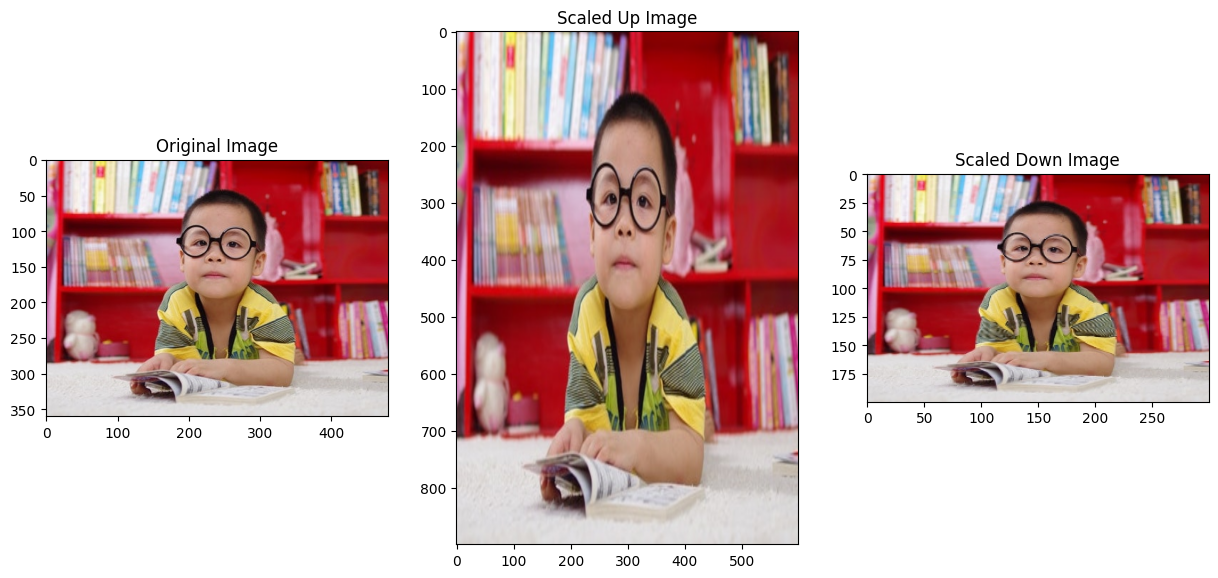

In [5]:
# Set rows and columns
resizeDownWidth = 300
resizeDownHeight = 200
resizedDown = cv2.resize(image, (resizeDownWidth, resizeDownHeight), interpolation= cv2.INTER_LINEAR)

# Mess up with the aspect ratio
resizeUpWidth = 600
resizeUpHeight = 900
resizedUp = cv2.resize(image, (resizeUpWidth, resizeUpHeight), interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(resizedUp[:,:,::-1]);plt.title("Scaled Up Image")
plt.subplot(133);plt.imshow(resizedDown[:,:,::-1]);plt.title("Scaled Down Image")

You can see that the output images have been scaled( check the axes )

It is also evident that the aspect ratio for the scaledUp output has been totally ruined. In most cases, it is a good idea to use the scaling factor to resize images. 

## <font style="color:rgb(50,120,229)">Method2 - Specify scaling factor</font>
This method is useful when you want to preserve the aspect ratio of the image. For example, say you have an image of size 400x600 and you want the width to be 360. Then, instead of specifying the height, you can find the scaling factor (i.e 360/600 = 0.6) and use it to resize the image.

In [6]:
# Scaling Down the image 1.5 times by specifying both scaling factors
scaleUpX = 1.5
scaleUpY = 1.5

# Scaling Down the image 0.6 times specifying a single scale factor.
scaleDown = 0.6

scaledDown = cv2.resize(image, None, fx= scaleDown, fy= scaleDown, interpolation= cv2.INTER_LINEAR)

scaledUp = cv2.resize(image, None, fx= scaleUpX, fy= scaleUpY, interpolation= cv2.INTER_LINEAR)

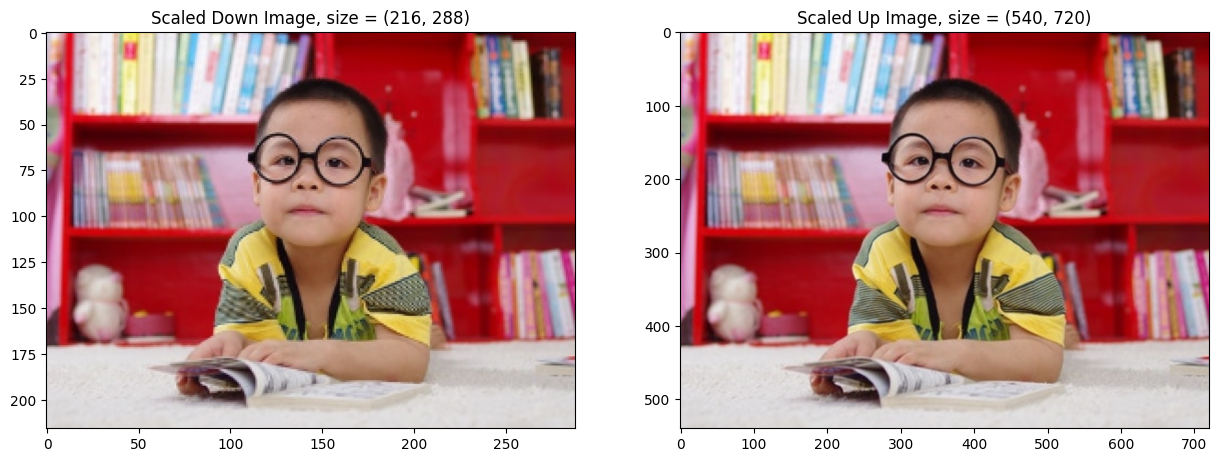

In [7]:
# We can also use the following syntax for displaying image
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(scaledDown[...,::-1]);plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]));
plt.subplot(122);plt.imshow(scaledUp[...,::-1]);plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]));

You can see that the aspect ratio has not ben disturbed.